In [1]:
import pandas as pd

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [3]:
data = pd.read_csv("demo_data_BMKG_Mamuju.csv")

In [4]:
data.head()

,time,latitude,longitude,depth,magnitude
0,2021-01-27T18:43:24.965Z,-2.97,118.83,11,3.7
1,2021-01-25T16:04:16.363Z,-3.01,118.80,47,2.8
2,2021-01-24T20:52:08.070Z,-2.94,118.61,10,2.6
3,2021-01-24T16:52:55.221Z,-3.00,118.80,35,2.4
4,2021-01-24T02:38:50.171Z,-2.95,118.88,14,3.1


In [5]:
list_time = list(data['time'])
time_pertama = list_time[0]
print("time_pertama", time_pertama)
print("tipe data",type(time_pertama))

time_pertama 2021-01-27T18:43:24.965Z
tipe data <class 'str'>


In [6]:
import datetime
help(datetime.datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



In [7]:
import time
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

In [8]:

time_pertama_dt = datetime.datetime.strptime(time_pertama, '%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:

print("time_pertama", time_pertama)
print("time_pertama_dt", time_pertama_dt)

time_pertama 2021-01-27T18:43:24.965Z
time_pertama_dt 2021-01-27 18:43:24.965000


In [10]:
list_time_dalam_datetime = []
for time in list_time:
    time_terkonversi = datetime.datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%fZ')
    list_time_dalam_datetime.append(time_terkonversi)

In [11]:
def filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, \
                         latitude, kedalaman, magnitudo):
    """Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman hasil filter
    magnitudo_hasil_filter : list
        List yang berisi magnitudo hasil filter
    """ 
        
    #katalog hasil_filter
    waktu_hasil_filter = []
    longitude_hasil_filter = []
    latitude_hasil_filter = []
    kedalaman_hasil_filter = []
    magnitudo_hasil_filter = []

    # mengumpulkan kolom menjadi satu `zip`
    katalog = zip(waktu, latitude, longitude, kedalaman, magnitudo)

    for t,lat,lon,ked,mag in katalog:
        # jika waktu lebih dari tanggal awal dan kurang dari tanggal akhir
        if t>waktu_awal and t<waktu_akhir:
            waktu_hasil_filter.append(t)
            longitude_hasil_filter.append(lon)
            latitude_hasil_filter.append(lat)
            kedalaman_hasil_filter.append(ked)
            magnitudo_hasil_filter.append(mag)
    
    print("Semua data",len(waktu))
    print("Data hasil_filter",len(waktu_hasil_filter))
    return waktu_hasil_filter, longitude_hasil_filter, latitude_hasil_filter, \
            kedalaman_hasil_filter, magnitudo_hasil_filter

In [12]:
help(filter_katalog_waktu)

Help on function filter_katalog_waktu in module __main__:

filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, latitude, kedalaman, magnitudo)
    Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman h

In [13]:

tanggal_awal = datetime.datetime(2021,1,14) # 12 Januari 2021
tanggal_akhir = datetime.datetime(2021,1,15) # 14 Januari 2021

hasil_filter = filter_katalog_waktu(tanggal_awal, tanggal_akhir, waktu, longitude, latitude, \
                                    kedalaman, magnitudo)

hasil_filter

NameError: name 'waktu' is not defined

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# mendefinisikan list waktu dan magnitudo
waktu_hasil_filter = waktu_hasil_filter
magnitudo_hasil_filter = magnitudo_hasil_filter

# membuat plot
fig, ax = plt.subplots()
ax.scatter(waktu, magnitudo, color="blue", label="asli")
ax.scatter(waktu_hasil_filter, magnitudo_hasil_filter, color="orange", label="hasil_filter")
ax.set_title("Grafik Magnitudo terhadap Waktu Kejadian \nGempa Mamuju")
ax.set_xlabel("Waktu")
ax.set_ylabel("Magnitudo (M)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.axvline(x=tanggal_awal, linestyle="--", color="grey")
ax.axvline(x=tanggal_akhir, linestyle="--", color="grey")
plt.xticks(rotation=65)
plt.legend()
plt.grid()

NameError: name 'waktu_hasil_filter' is not defined

In [15]:
katalog_dict['waktu'][:5]

NameError: name 'katalog_dict' is not defined

In [16]:
kolom_waktu = list_time_dalam_datetime
kolom_latitude = list(data['latitude'])
kolom_longitude = list(data['longitude'])
kolom_kedalaman = list(data['depth'])
kolom_magnitudo = list(data['magnitude'])

In [17]:
katalog_dict = dict(waktu=kolom_waktu,
                    latitude=kolom_latitude,
                    longitude=kolom_longitude,
                    kedalaman=kolom_kedalaman,
                    magnitudo=kolom_magnitudo)

katalog_dict

{'waktu': [datetime.datetime(2021, 1, 27, 18, 43, 24, 965000),
  datetime.datetime(2021, 1, 25, 16, 4, 16, 363000),
  datetime.datetime(2021, 1, 24, 20, 52, 8, 70000),
  datetime.datetime(2021, 1, 24, 16, 52, 55, 221000),
  datetime.datetime(2021, 1, 24, 2, 38, 50, 171000),
  datetime.datetime(2021, 1, 21, 11, 55, 35, 955000),
  datetime.datetime(2021, 1, 20, 14, 43, 48, 536000),
  datetime.datetime(2021, 1, 20, 14, 19, 28, 193000),
  datetime.datetime(2021, 1, 18, 13, 51, 39, 482000),
  datetime.datetime(2021, 1, 18, 9, 29, 21, 771000),
  datetime.datetime(2021, 1, 18, 4, 11, 17, 114000),
  datetime.datetime(2021, 1, 16, 17, 42, 58, 908000),
  datetime.datetime(2021, 1, 16, 10, 45, 50, 793000),
  datetime.datetime(2021, 1, 15, 23, 32, 53, 689000),
  datetime.datetime(2021, 1, 15, 12, 28, 53, 297000),
  datetime.datetime(2021, 1, 15, 7, 40, 49, 939000),
  datetime.datetime(2021, 1, 15, 5, 34, 38, 593000),
  datetime.datetime(2021, 1, 15, 1, 7, 50, 643000),
  datetime.datetime(2021, 1, 

In [18]:
katalog_dict['waktu'][:5]

[datetime.datetime(2021, 1, 27, 18, 43, 24, 965000),
 datetime.datetime(2021, 1, 25, 16, 4, 16, 363000),
 datetime.datetime(2021, 1, 24, 20, 52, 8, 70000),
 datetime.datetime(2021, 1, 24, 16, 52, 55, 221000),
 datetime.datetime(2021, 1, 24, 2, 38, 50, 171000)]

In [19]:
katalog_dict.keys()

dict_keys(['waktu', 'latitude', 'longitude', 'kedalaman', 'magnitudo'])

In [20]:
tanggal_awal = datetime.datetime(2021,1,14) # 12 Januari 2021
tanggal_akhir = datetime.datetime(2021,1,15) # 14 Januari 2021

#katalog hasil_filter
waktu_hasil_filter = []
longitude_hasil_filter = []
latitude_hasil_filter = []
kedalaman_hasil_filter = []
magnitudo_hasil_filter = []


# memisah masing-masing kolom lagi
waktu = katalog_dict['waktu']
latitude = katalog_dict['latitude']
longitude = katalog_dict['longitude']
kedalaman = katalog_dict['kedalaman']
magnitudo = katalog_dict['magnitudo']

# mengumpulkan kolom menjadi satu `zip`
katalog = zip(waktu, latitude, longitude, kedalaman, magnitudo)

for t,lat,lon,ked,mag in katalog:
    # jika waktu lebih dari tanggal awal dan kurang dari tanggal akhir
    if t>tanggal_awal and t<tanggal_akhir:
        waktu_hasil_filter.append(t)
        longitude_hasil_filter.append(lon)
        latitude_hasil_filter.append(lat)
        kedalaman_hasil_filter.append(ked)
        magnitudo_hasil_filter.append(mag)

In [21]:
print("Semua data",len(waktu))
print("Data hasil_filter",len(waktu_hasil_filter))

Semua data 42
Data hasil_filter 21


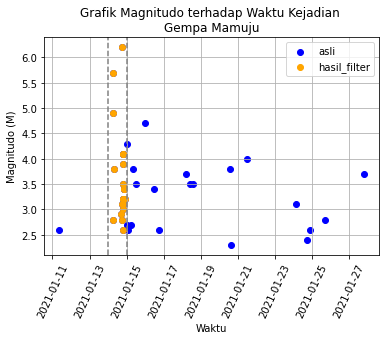

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# mendefinisikan list waktu dan magnitudo
waktu_hasil_filter = waktu_hasil_filter
magnitudo_hasil_filter = magnitudo_hasil_filter

# membuat plot
fig, ax = plt.subplots()
ax.scatter(waktu, magnitudo, color="blue", label="asli")
ax.scatter(waktu_hasil_filter, magnitudo_hasil_filter, color="orange", label="hasil_filter")
ax.set_title("Grafik Magnitudo terhadap Waktu Kejadian \nGempa Mamuju")
ax.set_xlabel("Waktu")
ax.set_ylabel("Magnitudo (M)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.axvline(x=tanggal_awal, linestyle="--", color="grey")
ax.axvline(x=tanggal_akhir, linestyle="--", color="grey")
plt.xticks(rotation=65)
plt.legend()
plt.grid()

In [23]:
def filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, \
                         latitude, kedalaman, magnitudo):
    """Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman hasil filter
    magnitudo_hasil_filter : list
        List yang berisi magnitudo hasil filter
    """ 
        
    #katalog hasil_filter
    waktu_hasil_filter = []
    longitude_hasil_filter = []
    latitude_hasil_filter = []
    kedalaman_hasil_filter = []
    magnitudo_hasil_filter = []

    # mengumpulkan kolom menjadi satu `zip`
    katalog = zip(waktu, latitude, longitude, kedalaman, magnitudo)

    for t,lat,lon,ked,mag in katalog:
        # jika waktu lebih dari tanggal awal dan kurang dari tanggal akhir
        if t>waktu_awal and t<waktu_akhir:
            waktu_hasil_filter.append(t)
            longitude_hasil_filter.append(lon)
            latitude_hasil_filter.append(lat)
            kedalaman_hasil_filter.append(ked)
            magnitudo_hasil_filter.append(mag)
    
    print("Semua data",len(waktu))
    print("Data hasil_filter",len(waktu_hasil_filter))
    return waktu_hasil_filter, longitude_hasil_filter, latitude_hasil_filter, \
            kedalaman_hasil_filter, magnitudo_hasil_filter

In [24]:
help(filter_katalog_waktu)

Help on function filter_katalog_waktu in module __main__:

filter_katalog_waktu(waktu_awal, waktu_akhir, waktu, longitude, latitude, kedalaman, magnitudo)
    Fungsi untuk memfilter katalog berdasarkan waktu
    
    Parameters:
    waktu_awal : datetime.datetime
        Waktu awal untuk proses filter
    waktu_akhir : datetime.datetime
        Waktu akhir untuk proses filter
    waktu : list
        List yang berisi waktu kejadian
    longitude : list
        List yang berisi longitude
    latitude : list
        List yang berisi latitude
    kedalaman : list
        List yang berisi kedalaman
    magnitudo : list
        List yang berisi magnitudo
    
        
    Returns:
    waktu_hasil_filter : list
        List yang berisi waktu kejadian hasil filter
    longitude_hasil_filter : list
        List yang berisi longitude hasil filter
    latitude_hasil_filter : list
        List yang berisi latitude hasil filter
    kedalaman_hasil_filter : list
        List yang berisi kedalaman h

In [25]:
tanggal_awal = datetime.datetime(2021,1,14) # 12 Januari 2021
tanggal_akhir = datetime.datetime(2021,1,15) # 14 Januari 2021

hasil_filter = filter_katalog_waktu(tanggal_awal, tanggal_akhir, waktu, longitude, latitude, \
                                    kedalaman, magnitudo)

hasil_filter

Semua data 42
Data hasil_filter 21


([datetime.datetime(2021, 1, 14, 22, 17, 34, 940000),
  datetime.datetime(2021, 1, 14, 20, 46, 12, 410000),
  datetime.datetime(2021, 1, 14, 20, 28, 7, 923000),
  datetime.datetime(2021, 1, 14, 19, 59, 7, 736000),
  datetime.datetime(2021, 1, 14, 19, 55, 26, 840000),
  datetime.datetime(2021, 1, 14, 19, 31, 13, 655000),
  datetime.datetime(2021, 1, 14, 19, 25, 24, 353000),
  datetime.datetime(2021, 1, 14, 19, 11, 19, 488000),
  datetime.datetime(2021, 1, 14, 19, 2, 1, 160000),
  datetime.datetime(2021, 1, 14, 18, 55, 16, 447000),
  datetime.datetime(2021, 1, 14, 18, 48, 52, 56000),
  datetime.datetime(2021, 1, 14, 18, 41, 54, 53000),
  datetime.datetime(2021, 1, 14, 18, 39, 57, 672000),
  datetime.datetime(2021, 1, 14, 18, 28, 20, 239000),
  datetime.datetime(2021, 1, 14, 18, 25, 39, 776000),
  datetime.datetime(2021, 1, 14, 17, 22, 36, 118000),
  datetime.datetime(2021, 1, 14, 17, 1, 7, 592000),
  datetime.datetime(2021, 1, 14, 7, 33, 55, 830000),
  datetime.datetime(2021, 1, 14, 6, 5

In [26]:
hasil_filter_t = hasil_filter [0]
hasil_filter_lon = hasil_filter [1]
hasil_filter_lat= hasil_filter [2]
hasil_filter_ked = hasil_filter [3]
hasil_filter_mag = hasil_filter [4]

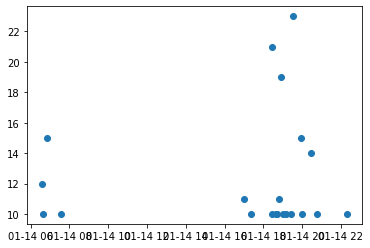

In [27]:
plt.scatter(hasil_filter_t, hasil_filter_ked)